# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import os
from matplotlib.ticker import FixedLocator

# Call Files

In [2]:
app_users = pd.read_csv('files/app_users.csv', low_memory=False)
payment_history = pd.read_csv('files/payment_history.csv', low_memory=False)
paid_user = pd.read_csv('files/paid_user.csv', low_memory=False)
app_writing_topics = pd.read_csv('files/app_user_writing_topics.csv', low_memory=False)
app_userfriends_amount = pd.read_csv('files/app_userfriends_amount.csv', low_memory=False)
app_usersetting_colortheme = pd.read_csv('files/app_usersettings_28.csv', low_memory=False)
hero_game_mission_history = pd.read_csv('files/hero_game_mission_history.csv', low_memory=False)
hero_inventory = pd.read_csv('files/hero_inventory.csv', low_memory=False)
hero_wardrobe_customize = pd.read_csv('files/hero_wardrobe_customize.csv', low_memory=False)
hero_areas = pd.read_csv('files/hero_areas.csv', low_memory=False)
user_chat = pd.read_csv('files/user_chat.csv', low_memory=False)
user_num_news_read = pd.read_csv('files/user_num_news_read.csv', low_memory=False)
write_files = pd.read_csv('files/write_files.csv', low_memory=False)
write_streaks = pd.read_csv('files/write_streaks.csv', low_memory=False)
write_wordcount = pd.read_csv('files/write_wordcount.csv', low_memory=False)


In [3]:
#to see unique values
def print_unique_values(data_frame, column_name):
    unique_contents = data_frame[column_name].unique()
    print(unique_contents)

#bar graph for counting
def count_bar_graph(data_frame, column_name, count_column_name):
    topic_counts = data_frame.groupby(column_name)[count_column_name].count()
    total_count = topic_counts.sum()
    topic_percentages = topic_counts / total_count * 100

    # Create a bar graph using matplotlib
    ax = topic_percentages.plot(kind='bar',color='#903794')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentage of {count_column_name} per {column_name}')
    
    # Update y-axis labels as percentages
    ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
    ax.set_yticklabels(['{:.1f}%'.format(x) for x in ax.get_yticks()])

    plt.show()
    
#print out unique value count
def count_unique_values(data_frame, column_name):
    count_unique = data_frame[column_name].nunique()
    return count_unique

#count not-null
def count_non_null_values(data_frame, column_name):
    count_non_null = data_frame[column_name].count()
    return count_non_null

#find duplicate value
def find_duplicates(table, column_name):
    duplicate_values = table[table.duplicated([column_name])][column_name].unique()
    return duplicate_values

#count id and merge it as a new column
def update_count(df, id_column, count_column):
    unique_counts = df[id_column].value_counts()
    df[count_column] = df[id_column].map(unique_counts)
    df_updated = df.drop_duplicates(id_column)
    return df_updated

#replace NaN on multiple columns to specific vale
def replace_nan_with_value(dataframe, columns, value):
    for column in columns:
        dataframe[column].fillna(value, inplace=True)











# Set Up Users_churn table

In [4]:
app_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48983 entries, 0 to 48982
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        48983 non-null  int64  
 1   idhero                    48983 non-null  int64  
 2   customerid                60 non-null     object 
 3   contactid                 128 non-null    float64
 4   idtype                    48983 non-null  int64  
 5   idteacher                 234 non-null    float64
 6   username                  48983 non-null  object 
 7   slug                      48983 non-null  object 
 8   display_name              0 non-null      float64
 9   email                     48983 non-null  object 
 10  bodytype                  48983 non-null  int64  
 11  provider                  0 non-null      float64
 12  provider_id               0 non-null      float64
 13  password                  0 non-null      float64
 14  rememb

In [5]:
app_users.head()

,id,idhero,customerid,contactid,idtype,idteacher,username,slug,display_name,email,...,reset_words,reset_minutes,inactive,bypass,reconstructed,expires_at,created_at,updated_at,status,username_change_at
0,1,1,NaN,NaN,1,NaN,user#1,user#1,NaN,user-1@4thewords.com,...,0,0,2019/10/21,0,0,2244/5/18 17:36,2017/12/7 22:55,2023/4/29 7:10,sleep,NaN
1,28032,29299,NaN,NaN,1,NaN,user#28032,user#28032,NaN,user-28032@4thewords.com,...,0,0,NaN,0,0,2020/6/24 19:00,2020/3/22 19:17,2020/5/24 18:00,sleep,NaN
2,14,3799,NaN,NaN,1,NaN,user#14,user#14,NaN,user-14@4thewords.com,...,0,0,2019/10/21,0,0,2019/11/4 23:59,2017/3/16 9:13,2018/10/1 18:12,sleep,NaN
3,24455,25722,NaN,NaN,1,NaN,user#24455,user#24455,NaN,user-24455@4thewords.com,...,0,0,NaN,0,0,2019/11/22 21:14,2019/10/23 20:14,2019/10/24 22:39,sleep,NaN
4,24369,25636,NaN,NaN,1,NaN,user#24369,user#24369,NaN,user-24369@4thewords.com,...,0,0,2019/10/21,0,0,2022/1/2 23:59,2019/10/21 10:39,2020/12/24 15:30,sleep,NaN


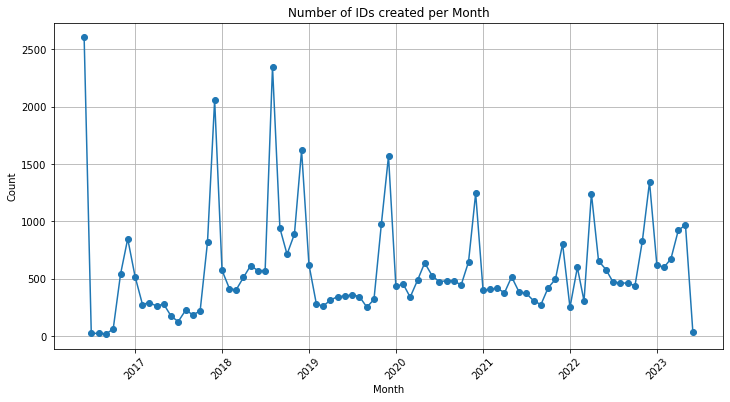

In [6]:
# Convert 'created_at' column to datetime format
app_users['created_at'] = pd.to_datetime(app_users['created_at'])

# Group the data by month and count the occurrences
monthly_counts = app_users.groupby(pd.Grouper(key='created_at', freq='M')).size()

# Set a wider figure size
plt.figure(figsize=(12, 6))

# Create the line chart
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of IDs created per Month')
plt.xticks(rotation=45)
plt.grid(True)

# Save the chart to a specific file
file_path = "/Users/chingyuhsieh/test/Dissertation/graphs/id_created_per_month.png"
plt.savefig(file_path)

# Show the chart
plt.show()


In [7]:
app_users_select = app_users[['id', 'idhero','tour','status']]

users_churn = app_users_select.merge(paid_user, left_on='id', right_on='paid_user', how='left')
print(users_churn)

users_churn.info()



          id  idhero  tour status  paid_user
0          1       1     1  sleep        1.0
1      28032   29299     0  sleep    28032.0
2         14    3799     0  sleep        NaN
3      24455   25722     0  sleep        NaN
4      24369   25636     0  sleep    24369.0
...      ...     ...   ...    ...        ...
48978  50531   51802     0  trial        NaN
48979  50532   51803     0  trial        NaN
48980  50533   51804     0  trial        NaN
48981  50534   51805     0  trial        NaN
48982  50535   51806     0  trial        NaN

[48983 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48983 entries, 0 to 48982
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         48983 non-null  int64  
 1   idhero     48983 non-null  int64  
 2   tour       48983 non-null  int64  
 3   status     48983 non-null  object 
 4   paid_user  8437 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory

In [8]:
#convert paid_user to bibary
users_churn['paid_user'] = users_churn['paid_user'].fillna(0)
users_churn['paid_user'] = users_churn['paid_user'].map(lambda x: 1 if x != 0 else x)
users_churn['paid_user'] = users_churn['paid_user'].round().astype(int)

#rename id to iduser
users_churn.rename(columns={'id': 'iduser'}, inplace=True)

users_churn

,iduser,idhero,tour,status,paid_user
0,1,1,1,sleep,1
1,28032,29299,0,sleep,1
2,14,3799,0,sleep,0
3,24455,25722,0,sleep,0
4,24369,25636,0,sleep,1
...,...,...,...,...,...
48978,50531,51802,0,trial,0
48979,50532,51803,0,trial,0
48980,50533,51804,0,trial,0
48981,50534,51805,0,trial,0


In [9]:
#unique iduser
unique_iduser = count_unique_values(users_churn, 'iduser')
print('The number of unique iduser values is:', unique_iduser)

The number of unique iduser values is: 48983


# app_writing_topics (skip)

In [10]:
#info
app_writing_topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2559 non-null   int64 
 1   idtopic     2559 non-null   int64 
 2   iduser      2559 non-null   int64 
 3   created_at  2559 non-null   object
 4   updated_at  2559 non-null   object
dtypes: int64(3), object(2)
memory usage: 100.1+ KB


In [11]:
#unique iduser
unique_iduser = count_unique_values(app_writing_topics, 'iduser')
print('The number of unique iduser values is:', unique_iduser) #there is duplication in iduser

The number of unique iduser values is: 1633


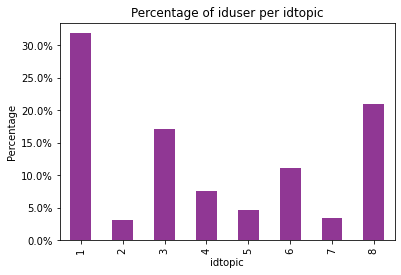

In [12]:
count_bar_graph(app_writing_topics, 'idtopic', 'iduser')

In [13]:
app_writing_topics.head()

,id,idtopic,iduser,created_at,updated_at
0,368,1,49032,2023-03-12 23:50:45,2023-03-12 23:50:45
1,417,1,49072,2023-03-14 02:12:32,2023-03-14 02:12:32
2,419,1,49073,2023-03-14 03:10:16,2023-03-14 03:10:16
3,420,1,49074,2023-03-14 05:14:12,2023-03-14 05:14:12
4,840,1,49387,2023-03-27 23:57:54,2023-03-27 23:57:54


# app_userfriends_amount

In [14]:
app_userfriends_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   host_id         5211 non-null   int64
 1   friends_amount  5211 non-null   int64
dtypes: int64(2)
memory usage: 81.5 KB


In [15]:
#unique iduser
unique_host_id = count_unique_values(app_userfriends_amount, 'host_id')
print('The number of unique host_id values is:', unique_host_id) #there is no duplication in host_id

The number of unique host_id values is: 5211


# app_usersettings_colortheme

In [16]:
app_usersetting_colortheme.info()
app_usersetting_colortheme.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   iduser           6719 non-null   int64 
 1   app_settings_id  6719 non-null   int64 
 2   value            6719 non-null   object
dtypes: int64(2), object(1)
memory usage: 157.6+ KB


,iduser,app_settings_id,value
0,28,28,obsidian
1,81,28,stoneCity
2,81,28,dark
3,116,28,charcoal
4,133,28,obsidian


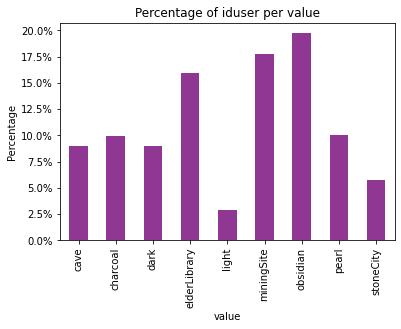

In [17]:
count_bar_graph(app_usersetting_colortheme, 'value', 'iduser')

In [18]:
#unique iduser
unique_iduser = count_unique_values(app_usersetting_colortheme, 'iduser')
print('The number of unique iduser values is:', unique_iduser) #there is no duplication in iduser

The number of unique iduser values is: 6131


In [19]:
# Call the function to find duplicated iduser values
duplicates = find_duplicates(app_usersetting_colortheme, 'iduser')

# # Print the duplicated iduser values
# print("Duplicated iduser values:")
# for iduser in duplicates:
#     print(iduser)

In [20]:
# Remove duplicate rows based on 'id_user' column
colortheme_unique = app_usersetting_colortheme.drop_duplicates(subset='iduser').copy()

# Create a new column 'customize' based on 'value' column
colortheme_unique.loc[:, 'customize'] = colortheme_unique['value'].map({'obsidian': 0}).fillna(1)


# Print the resulting table
print(colortheme_unique)

      iduser  app_settings_id         value  customize
0         28               28      obsidian        0.0
1         81               28     stoneCity        1.0
3        116               28      charcoal        1.0
4        133               28      obsidian        0.0
5        139               28    miningSite        1.0
...      ...              ...           ...        ...
6713   50458               28    miningSite        1.0
6715   50466               28      obsidian        0.0
6716   50483               28      obsidian        0.0
6717   50489               28  elderLibrary        1.0
6718   50494               28      obsidian        0.0

[6131 rows x 4 columns]


In [21]:
#drop colomns 
colortheme_customize = colortheme_unique.drop(columns = ['app_settings_id', 'value'])

print(colortheme_customize)

      iduser  customize
0         28        0.0
1         81        1.0
3        116        1.0
4        133        0.0
5        139        1.0
...      ...        ...
6713   50458        1.0
6715   50466        0.0
6716   50483        0.0
6717   50489        1.0
6718   50494        0.0

[6131 rows x 2 columns]


In [22]:

#turn customize to int
colortheme_customize['customize'] = colortheme_customize['customize'].astype(int)

print(colortheme_customize)

      iduser  customize
0         28          0
1         81          1
3        116          1
4        133          0
5        139          1
...      ...        ...
6713   50458          1
6715   50466          0
6716   50483          0
6717   50489          1
6718   50494          0

[6131 rows x 2 columns]


# hero_game_mission_history

In [23]:
hero_game_mission_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105722 entries, 0 to 2105721
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   category   object 
 1   idhero     float64
 2   idmission  float64
 3   status     object 
dtypes: float64(2), object(2)
memory usage: 64.3+ MB


In [24]:
hero_game_mission_history.head()

,category,idhero,idmission,status
0,common,28.0,1.0,completed
1,common,133.0,1.0,completed
2,common,169.0,1.0,completed
3,common,196.0,1.0,completed
4,common,204.0,1.0,completed


In [25]:
print_unique_values(hero_game_mission_history, 'category')

['common' 'required' 'daily' 'special']


In [26]:
print_unique_values(hero_game_mission_history, 'status')

['completed' 'lost' nan]


In [27]:
#null
null_count = hero_game_mission_history['status'].isnull().sum()
print('There are ' + str(null_count) + ' null in the status column.')

#unique iduser
unique_idheroes = count_unique_values(hero_game_mission_history, 'idhero')
print('The number of unique idhero values is:', unique_idheroes)

There are 23 null in the status column.
The number of unique idhero values is: 17166


In [28]:
# drop rows that status is null
hero_game_mission_history = hero_game_mission_history.dropna(subset=['status'])
#null
null_count = hero_game_mission_history['status'].isnull().sum()
print('There are ' + str(null_count) + ' null in the status column.')

There are 0 null in the status column.


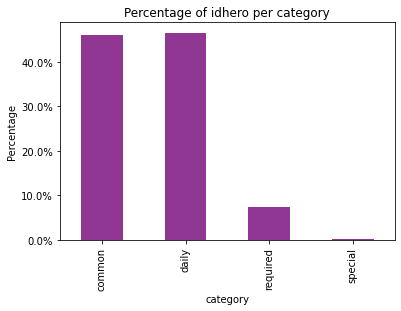

In [29]:
count_bar_graph(hero_game_mission_history, 'category', 'idhero')

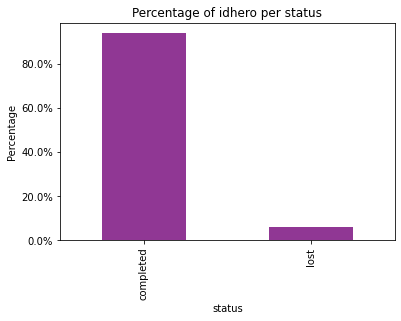

In [30]:
count_bar_graph(hero_game_mission_history, 'status', 'idhero')

In [31]:
# Drop idmission
hero_game_mission_history = hero_game_mission_history.drop('idmission', axis=1)


hero_game_mission_history

,category,idhero,status
0,common,28.0,completed
1,common,133.0,completed
2,common,169.0,completed
3,common,196.0,completed
4,common,204.0,completed
...,...,...,...
2105717,common,46039.0,completed
2105718,common,46132.0,completed
2105719,common,49804.0,completed
2105720,common,51706.0,completed


In [32]:
# Count occurrences of 'common' in the 'category' column
count_common = hero_game_mission_history[hero_game_mission_history['category'] == 'common'].groupby('idhero').size().reset_index(name='count_common')

# Count occurrences of 'required' in the 'category' column
count_required = hero_game_mission_history[hero_game_mission_history['category'] == 'required'].groupby('idhero').size().reset_index(name='count_required')

# Count occurrences of 'completed' in the 'status' column
count_completed = hero_game_mission_history[hero_game_mission_history['status'] == 'completed'].groupby('idhero').size().reset_index(name='count_completed')

# Count occurrences of 'lost' in the 'status' column
count_lost = hero_game_mission_history[hero_game_mission_history['status'] == 'lost'].groupby('idhero').size().reset_index(name='count_lost')

# Merge the counts based on 'idhero'
new_table = pd.merge(count_common, count_required, on='idhero', how='outer')
new_table = pd.merge(new_table, count_completed, on='idhero', how='outer')
new_table = pd.merge(new_table, count_lost, on='idhero', how='outer')

# Fill missing values with 0
hero_mission_count = new_table.fillna(0)

# Print the resulting table
print(hero_mission_count)

        idhero  count_common  count_required  count_completed  count_lost
0         28.0         316.0            93.0            393.0        52.0
1        133.0           2.0             0.0              2.0         0.0
2        169.0          14.0             8.0             23.0         4.0
3        196.0          10.0             6.0             16.0         0.0
4        204.0          20.0             0.0              4.0        17.0
...        ...           ...             ...              ...         ...
17161  42952.0           0.0             0.0              0.0         1.0
17162  43897.0           0.0             0.0              0.0         1.0
17163  44079.0           0.0             0.0              0.0         1.0
17164  44542.0           0.0             0.0              0.0         3.0
17165  45831.0           0.0             0.0              0.0         1.0

[17166 rows x 5 columns]


In [33]:
hero_mission_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17166 entries, 0 to 17165
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idhero           17166 non-null  float64
 1   count_common     17166 non-null  float64
 2   count_required   17166 non-null  float64
 3   count_completed  17166 non-null  float64
 4   count_lost       17166 non-null  float64
dtypes: float64(5)
memory usage: 804.7 KB


In [34]:
hero_mission_count = hero_mission_count.astype(int)
hero_mission_count

,idhero,count_common,count_required,count_completed,count_lost
0,28,316,93,393,52
1,133,2,0,2,0
2,169,14,8,23,4
3,196,10,6,16,0
4,204,20,0,4,17
...,...,...,...,...,...
17161,42952,0,0,0,1
17162,43897,0,0,0,1
17163,44079,0,0,0,1
17164,44542,0,0,0,3


# hero_areas

In [35]:
hero_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101845 entries, 0 to 101844
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   idhero  101845 non-null  int64
 1   idarea  101845 non-null  int64
dtypes: int64(2)
memory usage: 1.6 MB


In [36]:
hero_areas

,idhero,idarea
0,1,1
1,28,1
2,32,1
3,92,1
4,106,1
...,...,...
101840,45867,66
101841,46039,66
101842,46132,66
101843,49804,66


In [37]:
count_unique_values(hero_areas, 'idhero')

48666

In [38]:
# Grouping the data by 'idhero' and finding the maximum 'idarea' for each group
grouped_data = hero_areas.groupby('idhero')['idarea'].max().reset_index()

# Creating a new DataFrame with 'idhero' and 'highest_area' columns
hero_area_achieved = pd.DataFrame({'idhero': grouped_data['idhero'], 'highest_area': grouped_data['idarea']})

# Printing the new table
hero_area_achieved

,idhero,highest_area
0,1,1
1,28,66
2,32,1
3,92,1
4,106,1
...,...,...
48661,51802,1
48662,51803,1
48663,51804,1
48664,51805,1


# hero_inventory

In [39]:
hero_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619911 entries, 0 to 1619910
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   idhero      1619911 non-null  int64
 1   iditem      1619911 non-null  int64
 2   iditemtype  1619911 non-null  int64
dtypes: int64(3)
memory usage: 37.1 MB


In [40]:
#unique value for iditemtype
print_unique_values(hero_inventory, 'iditemtype')

[ 1  2  4  5  3  9  7 10]


In [41]:
#unique idhero
unique_idheroes = count_unique_values(hero_inventory, 'idhero')
print('The number of unique idhero values is:', unique_idheroes)

The number of unique idhero values is: 48931


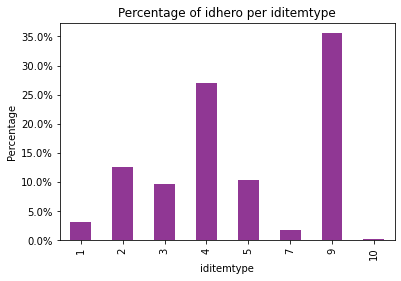

<Figure size 432x288 with 0 Axes>

In [42]:
count_bar_graph(hero_inventory, 'iditemtype', 'idhero')

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Idhero per itemtype.png')

In [43]:
# Count the number of unique appearances for each iduser
unique_counts = hero_inventory['idhero'].value_counts()

# Create a new column 'inventory_count' in the original DataFrame and populate it with the unique_counts values
hero_inventory['inventory_count'] = hero_inventory['idhero'].map(unique_counts)

# Merge the count_df with the original DataFrame, removing repetitions in 'iduser' column
hero_inventory_updated = hero_inventory.drop_duplicates('idhero')

#drop iditem, iditemtype
hero_inventory_count = hero_inventory_updated.drop(columns = ['iditem', 'iditemtype'])
hero_inventory_count

,idhero,inventory_count
0,1,116
116,28,405
521,32,25
546,92,21
567,106,26
...,...,...
1619858,51802,7
1619865,51803,20
1619885,51804,7
1619892,51805,10


In [44]:
# Check for null values in 'iduser' column
null_ids = hero_inventory['idhero'].isnull().any()

# Print the result
print(null_ids)

False


# hero_wardrobe_customize

In [45]:
hero_wardrobe_customize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48917 entries, 0 to 48916
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   idhero              48917 non-null  int64
 1   wardrobe_customize  48917 non-null  int64
dtypes: int64(2)
memory usage: 764.5 KB


# user_chat

In [46]:
user_chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52783 entries, 0 to 52782
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idsender    52783 non-null  int64  
 1   idreceiver  51949 non-null  float64
 2   idchat      52783 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [47]:
user_chat.head()

,idsender,idreceiver,idchat
0,11619,21834.0,1068
1,11619,11820.0,1070
2,21834,11619.0,1068
3,21834,11619.0,1068
4,22008,20375.0,861


In [48]:
#unique idchat
unique_iduser = count_unique_values(user_chat, 'idchat')
print('The number of unique idchat values is:', unique_iduser)

#unique idsender
unique_iduser = count_unique_values(user_chat, 'idsender')
print('The number of unique idsender values is:', unique_iduser)

#unique idreceiver
unique_iduser = count_unique_values(user_chat, 'idreceiver')
print('The number of unique idreceiver values is:', unique_iduser)

The number of unique idchat values is: 1305
The number of unique idsender values is: 1115
The number of unique idreceiver values is: 1190


In [49]:
# Grouping by 'idsender' and counting the occurrences of 'idchat'
send_table = user_chat.groupby('idsender')['idchat'].count().reset_index()

# Renaming the count column to 'chat_count'
send_table.rename(columns={'idchat': 'send_count'}, inplace=True)

#order
send_table = send_table.sort_values('send_count', ascending=False)

# Printing the new table
print(send_table)

      idsender  send_count
704      32865       14068
667      31807       10705
837      38432        3689
838      38460        2562
262      19035        1957
...        ...         ...
550      28093           1
553      28145           1
556      28269           1
558      28481           1
1114     50492           1

[1115 rows x 2 columns]


In [50]:
# Grouping by 'idreceiver' and counting the occurrences of 'idchat'
receive_table = user_chat.groupby('idreceiver')['idchat'].count().reset_index()

# Renaming the count column to 'chat_count'
receive_table.rename(columns={'idchat': 'receive_count'}, inplace=True)

# Printing the new table
print(receive_table)

      idreceiver  receive_count
0           28.0             57
1          274.0              1
2          298.0              3
3          682.0              6
4          698.0              1
...          ...            ...
1185     49791.0             12
1186     49855.0              1
1187     50224.0              7
1188     50245.0              5
1189     50266.0              1

[1190 rows x 2 columns]


In [51]:
# Merge the two tables
dm_count_table = send_table.merge(receive_table, left_on='idsender', right_on='idreceiver', how='outer')

# Printing the merged table
print(dm_count_table)


      idsender  send_count  idreceiver  receive_count
0      32865.0     14068.0     32865.0        10878.0
1      31807.0     10705.0     31807.0        13902.0
2      38432.0      3689.0     38432.0         2562.0
3      38460.0      2562.0     38460.0         3689.0
4      19035.0      1957.0     19035.0         1730.0
...        ...         ...         ...            ...
1445       NaN         NaN     48983.0            1.0
1446       NaN         NaN     49151.0            2.0
1447       NaN         NaN     49558.0            1.0
1448       NaN         NaN     50245.0            5.0
1449       NaN         NaN     50266.0            1.0

[1450 rows x 4 columns]


# user_num_news_read

In [52]:
user_num_news_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19096 entries, 0 to 19095
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   iduser         19096 non-null  int64
 1   num_news_read  19096 non-null  int64
dtypes: int64(2)
memory usage: 298.5 KB


In [53]:
user_num_news_read.head()

,iduser,num_news_read
0,14,19
1,28,479
2,50,19
3,52,40
4,73,30


In [54]:
#unique iduser
unique_iduser = count_unique_values(user_num_news_read, 'iduser')
print('The number of unique iduser values is:', unique_iduser)

The number of unique iduser values is: 19096


# write_files

In [55]:
write_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184534 entries, 0 to 1184533
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   iduser       1184534 non-null  int64 
 1   wordcount    1184534 non-null  int64 
 2   exported_at  30978 non-null    object
 3   deleted_at   194501 non-null   object
dtypes: int64(2), object(2)
memory usage: 36.1+ MB


In [56]:
write_files.head()

,iduser,wordcount,exported_at,deleted_at
0,14,6,NaN,NaN
1,21,6,NaN,NaN
2,22,254,NaN,NaN
3,29,6,NaN,NaN
4,30,6,NaN,NaN


In [57]:
#unique iduser
unique_iduser = count_unique_values(write_files, 'iduser')
print('The number of unique iduser values is:', unique_iduser)

The number of unique iduser values is: 48165


In [58]:
# Count the occurrences of each unique iduser
count_series = write_files['iduser'].value_counts()

# Create a new DataFrame with 'iduser' and 'count' columns
count_df = pd.DataFrame({'iduser': count_series.index, 'count': count_series.values})

# Merge the count_df with the original DataFrame, removing repetitions in 'iduser' column
merged_df = write_files.drop_duplicates('iduser').merge(count_df, on='iduser')

# Assuming you want to drop rows with index 0 and 2
merged_df.drop([0, 2], inplace=True)


In [59]:
import pandas as pd

# Assuming your table is represented as a Pandas DataFrame named 'write_files'
# with the column 'iduser'

# Count the occurrences of each unique iduser
count_series = write_files['iduser'].value_counts()

# Create a new DataFrame with 'iduser' and 'count' columns
count_df = pd.DataFrame({'iduser': count_series.index, 'count': count_series.values})

# Merge the count_df with the original DataFrame, removing repetitions in 'iduser' column
write_files_updated = write_files.drop_duplicates('iduser').merge(count_df, on='iduser')

# Rename the columns for better clarity
write_files_updated = write_files_updated.rename(columns={'count_x': 'count'})
# # Drop the 'files_count' and 'count_y' columns
# write_files_updated = write_files_updated.drop(columns=['files_count', 'count_y'])

# Print the merged DataFrame
write_files_updated



,iduser,wordcount,exported_at,deleted_at,count
0,14,6,NaN,NaN,69
1,21,6,NaN,NaN,1
2,22,254,NaN,NaN,15
3,29,6,NaN,NaN,3
4,30,6,NaN,NaN,1
...,...,...,...,...,...
48160,50531,238,NaN,NaN,2
48161,50532,238,NaN,NaN,5
48162,50533,238,NaN,NaN,2
48163,50534,0,NaN,NaN,2


In [60]:
#drop columns
write_files_updated = write_files.drop(['wordcount', 'exported_at', 'deleted_at'], axis=1)
write_files_updated

,iduser
0,14
1,21
2,22
3,29
4,30
...,...
1184529,24007
1184530,44086
1184531,49501
1184532,38877


# write_streaks

In [61]:
write_streaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154200 entries, 0 to 154199
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   iduser      154200 non-null  int64 
 1   count       154200 non-null  int64 
 2   start_date  154200 non-null  object
 3   end_date    154200 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.7+ MB


In [62]:
write_streaks.head()


,iduser,count,start_date,end_date
0,28,2,2015-11-23,2015-11-24
1,28,2,2015-11-30,2015-12-01
2,28,2,2015-12-11,2015-12-14
3,133,5,2015-11-23,2015-11-28
4,133,2,2015-12-06,2015-12-07


In [63]:
#unique_iduser
unique_iduser = count_unique_values(write_streaks, 'iduser')
print('The number of unique iduser values is:', unique_iduser)

The number of unique iduser values is: 25702


In [64]:
write_streaks = write_streaks.sort_values('count', ascending=False)
write_streaks

,iduser,count,start_date,end_date
26,978,2717,2015-11-23,2023-05-01
10176,1586,2681,2015-12-29,2023-05-01
26849,2004,2456,2016-08-10,2023-05-01
25807,2175,2388,2016-10-08,2023-04-22
24671,937,2376,2016-10-29,2023-05-01
...,...,...,...,...
67826,28154,1,2020-03-29,2020-03-29
67825,19571,1,2020-03-29,2020-03-29
67824,26698,1,2020-03-29,2020-03-29
67823,23348,1,2020-03-29,2020-03-29


In [65]:
# Calculate the highest streak for each iduser
highest_streak_df = write_streaks.groupby('iduser')['count'].max().reset_index()

# Rename the 'count' column to 'highest_streaks'
highest_streak_df = highest_streak_df.rename(columns={'count': 'highest_streak'})

# Retrieve unique idusers
unique_idusers = highest_streak_df['iduser'].unique()

# Create a new DataFrame with unique idusers and their highest streak
output_df = pd.DataFrame({'iduser': unique_idusers})

# Merge the highest streak information into the output DataFrame
highest_streak = output_df.merge(highest_streak_df, on=['iduser'])

print(highest_streak)

       iduser  highest_streak
0          14               1
1          28             107
2          81            1136
3         106               3
4         114               1
...       ...             ...
25697   50521               2
25698   50523               1
25699   50529               1
25700   50532               1
25701   50534               1

[25702 rows x 2 columns]


# write_wordcount

In [66]:
write_wordcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471937 entries, 0 to 2471936
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   iduser           int64 
 1   words            int64 
 2   minutes          int64 
 3   display_words    int64 
 4   display_minutes  int64 
 5   date             object
dtypes: int64(5), object(1)
memory usage: 113.2+ MB


In [67]:
#unique_iduser
unique_iduser = count_unique_values(write_wordcount, 'iduser')
print('The number of unique iduser values is:', unique_iduser)

The number of unique iduser values is: 36758


In [68]:
write_wordcount.head()

,iduser,words,minutes,display_words,display_minutes,date
0,4500,0,0,-1,-1,2017-01-16
1,948,0,0,-1,-1,2017-08-10
2,5167,0,0,-1,-1,2017-08-09
3,1877,0,0,-1,-1,2017-01-16
4,4732,0,0,-1,-1,2017-08-10


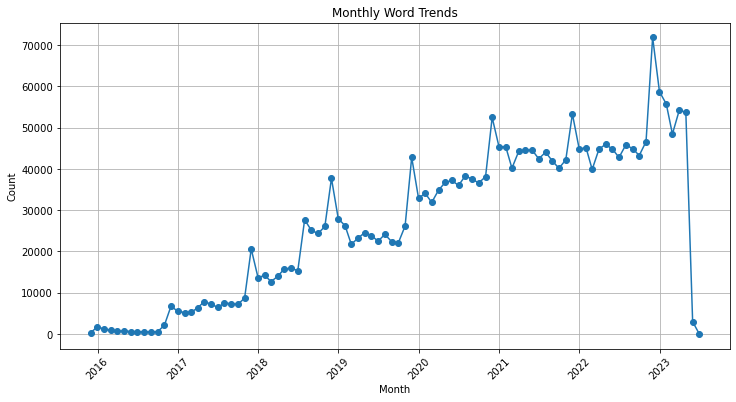

In [69]:
# Convert 'date' column to datetime format
write_wordcount['date'] = pd.to_datetime(write_wordcount['date'])

# Group the data by month and count the occurrences
monthly_counts = write_wordcount.groupby(pd.Grouper(key='date', freq='M')).size()

# Set a wider figure size
plt.figure(figsize=(12, 6))

# Create the line chart
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Word Trends')
plt.xticks(rotation=45)
plt.grid(True)

# Save the chart to a specific file
file_path = "/Users/chingyuhsieh/test/Dissertation/graphs/monthly_word_trend.png"
plt.savefig(file_path)

# Show the chart
plt.show()

In [70]:
#wordcounts per iduser
# Group by 'iduser' and calculate the sum of 'words' for each group
sum_wordcount= write_wordcount.groupby('iduser')['words'].sum().reset_index()

# Rename the 'words' column to 'sum_wordcount'
sum_wordcount= sum_wordcount.rename(columns={'words': 'sum_wordcount'})

print(sum_wordcount)

       iduser  sum_wordcount
0          14           2355
1          28        3563866
2          32            496
3          50              0
4          52              0
...       ...            ...
36753   50531             21
36754   50532          10949
36755   50533             27
36756   50534            221
36757   50535            111

[36758 rows x 2 columns]


In [71]:
# Convert the 'date' column to datetime if it's not already in that format
write_wordcount['date'] = pd.to_datetime(write_wordcount['date'])

# Create a new DataFrame with the earliest dates for each user
earliest_dates = write_wordcount.groupby('iduser')['date'].min().reset_index()

# Create a new DataFrame with the most recent dates for each user
most_recent_dates = write_wordcount.groupby('iduser')['date'].max().reset_index()

# Merge the two DataFrames based on 'iduser' to get the first_date and last_date columns
wordcount_first_last_dates = pd.merge(earliest_dates, most_recent_dates, on='iduser')

# Rename the columns to 'first_date' and 'last_date'
wordcount_first_last_dates.columns = ['iduser', 'first_date', 'last_date']

# Print the new table
wordcount_first_last_dates

,iduser,first_date,last_date
0,14,2017-03-16,2017-04-02
1,28,2015-11-23,2023-04-15
2,32,2018-08-25,2018-09-05
3,50,2016-12-31,2018-12-01
4,52,2017-07-05,2017-07-08
...,...,...,...
36753,50531,2023-05-02,2023-05-02
36754,50532,2023-05-02,2023-05-02
36755,50533,2023-05-02,2023-05-02
36756,50534,2023-05-02,2023-05-02


In [72]:
wordcount_first_last_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36758 entries, 0 to 36757
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   iduser      36758 non-null  int64         
 1   first_date  36758 non-null  datetime64[ns]
 2   last_date   36758 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.1 MB


In [73]:
wordcount_first_last_dates.to_csv('wordcount_first_last_dates.csv', index=False)

# Join all user behavior

In [74]:
#left join all tables
tables = [users_churn, colortheme_customize, user_num_news_read, write_files_updated,highest_streak, sum_wordcount]

# Perform the full joins
user_behavior = tables[0]
for table in tables[1:]:
    user_behavior = pd.merge(user_behavior, table, on='iduser', how='outer')
    
user_behavior

,iduser,idhero,tour,status,paid_user,customize,num_news_read,highest_streak,sum_wordcount
0,1,1.0,1.0,sleep,1.0,NaN,NaN,NaN,NaN
1,28032,29299.0,0.0,sleep,1.0,NaN,21.0,20.0,30070.0
2,28032,29299.0,0.0,sleep,1.0,NaN,21.0,20.0,30070.0
3,28032,29299.0,0.0,sleep,1.0,NaN,21.0,20.0,30070.0
4,28032,29299.0,0.0,sleep,1.0,NaN,21.0,20.0,30070.0
...,...,...,...,...,...,...,...,...,...
1185348,50534,51805.0,0.0,trial,0.0,NaN,30.0,1.0,221.0
1185349,50534,51805.0,0.0,trial,0.0,NaN,30.0,1.0,221.0
1185350,50535,51806.0,0.0,trial,0.0,NaN,30.0,NaN,111.0
1185351,50535,51806.0,0.0,trial,0.0,NaN,30.0,NaN,111.0


In [75]:
# Drop duplicate rows based on all columns
user_behavior = user_behavior.drop_duplicates()

user_behavior

,iduser,idhero,tour,status,paid_user,customize,num_news_read,highest_streak,sum_wordcount
0,1,1.0,1.0,sleep,1.0,NaN,NaN,NaN,NaN
1,28032,29299.0,0.0,sleep,1.0,NaN,21.0,20.0,30070.0
23,14,3799.0,0.0,sleep,0.0,NaN,19.0,1.0,2355.0
92,24455,25722.0,0.0,sleep,0.0,NaN,NaN,NaN,NaN
93,24369,25636.0,0.0,sleep,1.0,NaN,108.0,207.0,242181.0
...,...,...,...,...,...,...,...,...,...
1185341,50532,51803.0,0.0,trial,0.0,NaN,30.0,1.0,10949.0
1185346,50533,51804.0,0.0,trial,0.0,NaN,30.0,NaN,27.0
1185348,50534,51805.0,0.0,trial,0.0,NaN,30.0,1.0,221.0
1185350,50535,51806.0,0.0,trial,0.0,NaN,30.0,NaN,111.0


In [76]:
# Check for null values in 'iduser' column
null_ids = user_behavior['iduser'].isnull().any()

# Print the result
print(null_ids)

False


In [77]:
#which iduser is not in app_users
# Get unique 'iduser' values from 'users_churn'
unique_ids_churn = users_churn['iduser'].unique()

# Get unique 'iduser' values from merged DataFrame
unique_ids_merged = user_behavior['iduser'].unique()

# Find the additional 'iduser' value in the merged DataFrame
additional_iduser = set(unique_ids_merged) - set(unique_ids_churn)

# Print the additional 'iduser' value
print(additional_iduser)

{5838}


In [78]:
#join app_userfriends_amount

user_behavior = pd.merge(user_behavior, app_userfriends_amount, left_on='iduser', right_on='host_id', how='outer')
    
user_behavior

,iduser,idhero,tour,status,paid_user,customize,num_news_read,highest_streak,sum_wordcount,host_id,friends_amount
0,1,1.0,1.0,sleep,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,28032,29299.0,0.0,sleep,1.0,NaN,21.0,20.0,30070.0,NaN,NaN
2,14,3799.0,0.0,sleep,0.0,NaN,19.0,1.0,2355.0,NaN,NaN
3,24455,25722.0,0.0,sleep,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,24369,25636.0,0.0,sleep,1.0,NaN,108.0,207.0,242181.0,24369.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
48979,50532,51803.0,0.0,trial,0.0,NaN,30.0,1.0,10949.0,NaN,NaN
48980,50533,51804.0,0.0,trial,0.0,NaN,30.0,NaN,27.0,NaN,NaN
48981,50534,51805.0,0.0,trial,0.0,NaN,30.0,1.0,221.0,NaN,NaN
48982,50535,51806.0,0.0,trial,0.0,NaN,30.0,NaN,111.0,NaN,NaN


In [79]:
#join all hero tables
tables = [user_behavior, hero_mission_count, hero_area_achieved, hero_inventory_count, hero_wardrobe_customize]

# Perform the full joins
user_behavior = tables[0]
for table in tables[1:]:
    user_behavior = pd.merge(user_behavior, table, on='idhero', how='outer')
    
user_behavior

,iduser,idhero,tour,status,paid_user,customize,num_news_read,highest_streak,sum_wordcount,host_id,friends_amount,count_common,count_required,count_completed,count_lost,highest_area,inventory_count,wardrobe_customize
0,1.0,1.0,1.0,sleep,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,116.0,0.0
1,28032.0,29299.0,0.0,sleep,1.0,NaN,21.0,20.0,30070.0,NaN,NaN,2.0,3.0,5.0,0.0,1.0,26.0,0.0
2,14.0,3799.0,0.0,sleep,0.0,NaN,19.0,1.0,2355.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.0,0.0
3,24455.0,25722.0,0.0,sleep,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0
4,24369.0,25636.0,0.0,sleep,1.0,NaN,108.0,207.0,242181.0,24369.0,2.0,78.0,13.0,138.0,25.0,4.0,170.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49001,NaN,10593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49002,NaN,10594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49003,NaN,10595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49004,NaN,10596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [80]:
# Check for null values in 'iduser' column
null_ids = user_behavior['iduser'].isnull().any()

# Print the result
print(null_ids)

True


In [81]:
null_idhero_rows = user_behavior[user_behavior['iduser'].isnull()]

null_idhero_rows

,iduser,idhero,tour,status,paid_user,customize,num_news_read,highest_streak,sum_wordcount,host_id,friends_amount,count_common,count_required,count_completed,count_lost,highest_area,inventory_count,wardrobe_customize
48984,NaN,10869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,11.0,0.0,NaN,NaN,NaN
48985,NaN,28679.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,4.0,26.0,3.0,NaN,NaN,NaN
48986,NaN,29927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,0.0,NaN,NaN,NaN
48987,NaN,32907.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,6.0,28.0,1.0,NaN,NaN,NaN
48988,NaN,18973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN,NaN
48989,NaN,19934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN,NaN
48990,NaN,23916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN,NaN
48991,NaN,35321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
48992,NaN,10583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
48993,NaN,10584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


# Clean user_behavior

In [82]:
# drop meaningless column host_id
user_behavior = user_behavior.drop(columns=['host_id','status'])

user_behavior

,iduser,idhero,tour,paid_user,customize,num_news_read,highest_streak,sum_wordcount,friends_amount,count_common,count_required,count_completed,count_lost,highest_area,inventory_count,wardrobe_customize
0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,116.0,0.0
1,28032.0,29299.0,0.0,1.0,NaN,21.0,20.0,30070.0,NaN,2.0,3.0,5.0,0.0,1.0,26.0,0.0
2,14.0,3799.0,0.0,0.0,NaN,19.0,1.0,2355.0,NaN,NaN,NaN,NaN,NaN,1.0,27.0,0.0
3,24455.0,25722.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0
4,24369.0,25636.0,0.0,1.0,NaN,108.0,207.0,242181.0,2.0,78.0,13.0,138.0,25.0,4.0,170.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49001,NaN,10593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49002,NaN,10594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49003,NaN,10595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49004,NaN,10596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [83]:
user_behavior = user_behavior[user_behavior['iduser'] != 5838]
user_behavior

,iduser,idhero,tour,paid_user,customize,num_news_read,highest_streak,sum_wordcount,friends_amount,count_common,count_required,count_completed,count_lost,highest_area,inventory_count,wardrobe_customize
0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,116.0,0.0
1,28032.0,29299.0,0.0,1.0,NaN,21.0,20.0,30070.0,NaN,2.0,3.0,5.0,0.0,1.0,26.0,0.0
2,14.0,3799.0,0.0,0.0,NaN,19.0,1.0,2355.0,NaN,NaN,NaN,NaN,NaN,1.0,27.0,0.0
3,24455.0,25722.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0
4,24369.0,25636.0,0.0,1.0,NaN,108.0,207.0,242181.0,2.0,78.0,13.0,138.0,25.0,4.0,170.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49001,NaN,10593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49002,NaN,10594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49003,NaN,10595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
49004,NaN,10596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [84]:
user_behavior = user_behavior.dropna(subset=['iduser'])
user_behavior

,iduser,idhero,tour,paid_user,customize,num_news_read,highest_streak,sum_wordcount,friends_amount,count_common,count_required,count_completed,count_lost,highest_area,inventory_count,wardrobe_customize
0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,116.0,0.0
1,28032.0,29299.0,0.0,1.0,NaN,21.0,20.0,30070.0,NaN,2.0,3.0,5.0,0.0,1.0,26.0,0.0
2,14.0,3799.0,0.0,0.0,NaN,19.0,1.0,2355.0,NaN,NaN,NaN,NaN,NaN,1.0,27.0,0.0
3,24455.0,25722.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0
4,24369.0,25636.0,0.0,1.0,NaN,108.0,207.0,242181.0,2.0,78.0,13.0,138.0,25.0,4.0,170.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48978,50531.0,51802.0,0.0,0.0,NaN,30.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,0.0
48979,50532.0,51803.0,0.0,0.0,NaN,30.0,1.0,10949.0,NaN,NaN,NaN,NaN,NaN,1.0,20.0,0.0
48980,50533.0,51804.0,0.0,0.0,NaN,30.0,NaN,27.0,NaN,1.0,0.0,1.0,0.0,1.0,7.0,0.0
48981,50534.0,51805.0,0.0,0.0,NaN,30.0,1.0,221.0,NaN,2.0,0.0,2.0,0.0,1.0,10.0,0.0


In [85]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48983 entries, 0 to 48982
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iduser              48983 non-null  float64
 1   idhero              48983 non-null  float64
 2   tour                48983 non-null  float64
 3   paid_user           48983 non-null  float64
 4   customize           6131 non-null   float64
 5   num_news_read       19096 non-null  float64
 6   highest_streak      25701 non-null  float64
 7   sum_wordcount       36758 non-null  float64
 8   friends_amount      5211 non-null   float64
 9   count_common        17159 non-null  float64
 10  count_required      17159 non-null  float64
 11  count_completed     17159 non-null  float64
 12  count_lost          17159 non-null  float64
 13  highest_area        48665 non-null  float64
 14  inventory_count     48916 non-null  float64
 15  wardrobe_customize  48916 non-null  float64
dtypes: f

In [86]:
columns_to_replace = ['customize', 'num_news_read', 'highest_streak', 'sum_wordcount','friends_amount', 'count_common','count_required','count_completed','count_lost','highest_area','inventory_count']
replace_nan_with_value(user_behavior, columns_to_replace, 0)

user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48983 entries, 0 to 48982
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iduser              48983 non-null  float64
 1   idhero              48983 non-null  float64
 2   tour                48983 non-null  float64
 3   paid_user           48983 non-null  float64
 4   customize           48983 non-null  float64
 5   num_news_read       48983 non-null  float64
 6   highest_streak      48983 non-null  float64
 7   sum_wordcount       48983 non-null  float64
 8   friends_amount      48983 non-null  float64
 9   count_common        48983 non-null  float64
 10  count_required      48983 non-null  float64
 11  count_completed     48983 non-null  float64
 12  count_lost          48983 non-null  float64
 13  highest_area        48983 non-null  float64
 14  inventory_count     48983 non-null  float64
 15  wardrobe_customize  48916 non-null  float64
dtypes: f

/var/folders/q7/ylll3z6s53358qghdrrdyqbh0000gn/T/ipykernel_9275/1432919006.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].fillna(value, inplace=True)


In [87]:
# user_behavior = user_behavior.astype(int)
# user_behavior

In [88]:
user_behavior.to_csv('user_behavior_modified.csv', index=False)

In [89]:
user_payment_column = user_behavior[['iduser', 'idhero', 'paid_user']]

In [90]:
user_payment_column = user_payment_column.astype(int)

In [91]:
user_payment_column.to_csv('user_bin_payment.csv', index=False)